<a href="https://www.kaggle.com/code/muhumuzadeusai/optimal-fertilizers-optuna-cat-xgb?scriptVersionId=244224763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: GRAY; text-align: center; color: orange; font-size: 50px">
    <h1>🪴</h1>
</div>

In [1]:
# IMPORT BASE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Notebook Settings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORT DATASETS (TRAIN & TEST)
train_data = pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e6/test.csv")

<div style="text-align: center; color: orange; font-size: 20px">
    <h1>1). Understanding The Datasets🤔</h1>
</div>

In [3]:
# Considering the train dataset...
print("\n>>>>>>>>>>>>>>>>>>>>>THE FRIST FIVE INSTANCES IN TRAIN<<<<<<<<<<<<<<<<<<<<<\n")
display(train_data.head())
print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>TRAIN DATA INFORMATION<<<<<<<<<<<<<<<<<<<<<<<<<\n")
display(train_data.info())
print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>TRAIN DATA SUMMARY STATS<<<<<<<<<<<<<<<<<<<<<\n")
display(train_data.describe())



>>>>>>>>>>>>>>>>>>>>>THE FRIST FIVE INSTANCES IN TRAIN<<<<<<<<<<<<<<<<<<<<<



,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP



>>>>>>>>>>>>>>>>>>>>>>>>>>>>TRAIN DATA INFORMATION<<<<<<<<<<<<<<<<<<<<<<<<<

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


None


>>>>>>>>>>>>>>>>>>>>>>>>>>>TRAIN DATA SUMMARY STATS<<<<<<<<<<<<<<<<<<<<<



,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
# Considering the test data...
print("\n>>>>>>>>>>>>>>>>>>>>>THE FRIST FIVE INSTANCES IN TEST<<<<<<<<<<<<<<<<<<<<<\n")
display(test_data.head())
print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>TEST DATA INFORMATION<<<<<<<<<<<<<<<<<<<<<<<<<\n")
display(test_data.info())
print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>TEST DATA SUMMARY STATS<<<<<<<<<<<<<<<<<<<<<\n")
display(test_data.describe())


>>>>>>>>>>>>>>>>>>>>>THE FRIST FIVE INSTANCES IN TEST<<<<<<<<<<<<<<<<<<<<<



,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14



>>>>>>>>>>>>>>>>>>>>>>>>>>>>TEST DATA INFORMATION<<<<<<<<<<<<<<<<<<<<<<<<<

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


None


>>>>>>>>>>>>>>>>>>>>>>>>>>>TEST DATA SUMMARY STATS<<<<<<<<<<<<<<<<<<<<<



,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,874999.500000,31.491648,61.045120,45.190444,23.139612,9.487764,21.12206
std,72168.927986,4.024093,6.636372,11.793167,11.215956,5.766860,12.38087
min,750000.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.00000
25%,812499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.00000
50%,874999.500000,31.000000,61.000000,45.000000,23.000000,10.000000,21.00000
75%,937499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.00000
max,999999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.00000


## 1a). *Key TakeAways* 
* **No missing data** in both the train and test datasets
* Train dataset contains **750,000** examples with **10 variables**
* Test dataset contains **250,000** examples with **9 variables** (excluding the target variable)
  

<div style="text-align: center; color: purple; font-size: 20px">
    <h1>2). Basic EDA📊</h1>
</div>

In [5]:
# ALL THE EDA IS CARRIED OUT ON THE TRAINING DATASET

# Drop id variable
train_data_v2 = train_data.copy()
train_data_v2.drop(["id"], axis=1, inplace=True)

plotting:   0%|          | 0/6 [00:00<?, ?it/s]

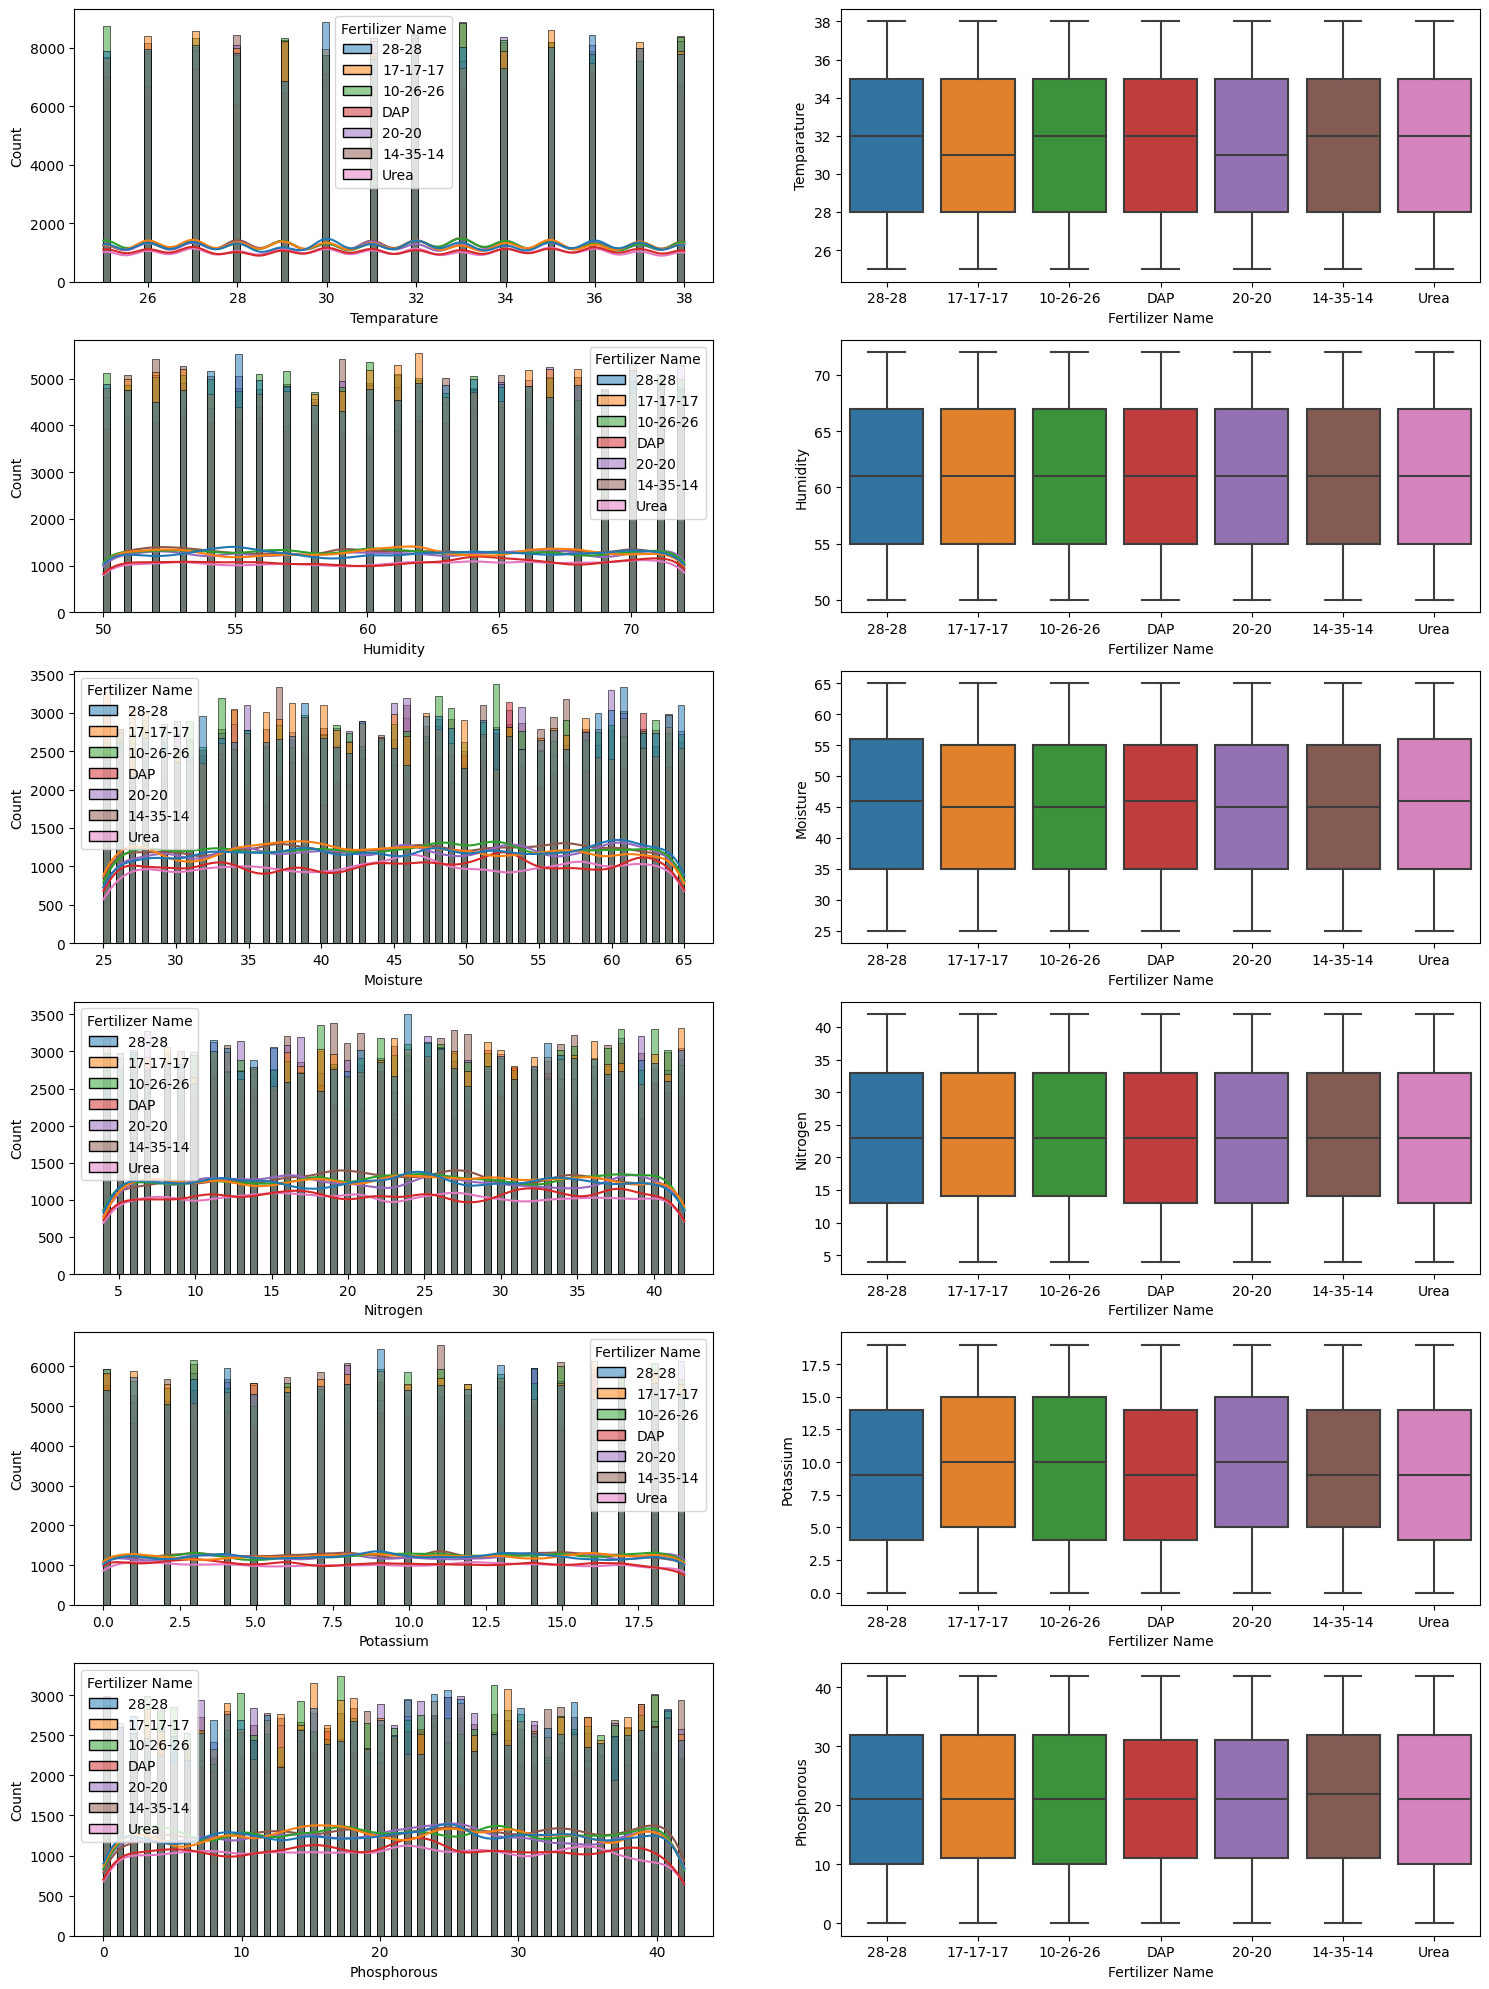

In [6]:
# Understanding the distribution of numerical variables

# Helper function to do that
def plot_hist_box(df, target_col):
    col_name_list = df.select_dtypes(include=np.number).columns.tolist()
    # Create plot canvas
    fig, axes = plt.subplots(int(len(col_name_list)), 2, figsize=(15, 20))
    # axes = axes.flatten()
    for i, col in tqdm(enumerate(col_name_list), total=len(col_name_list), desc="plotting"):
        sns.histplot(data=df, x=col, hue=target_col, kde=True, ax=axes[i, 0])
        sns.boxplot(data=df, y=col, x=target_col, ax=axes[i, 1])

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)

plot_hist_box(train_data_v2, "Fertilizer Name")

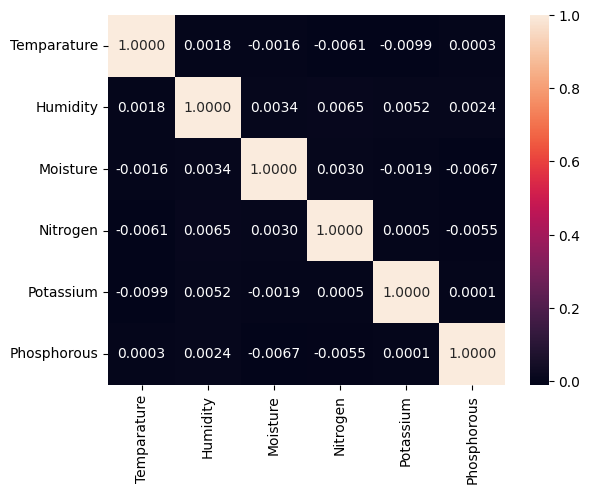

In [7]:
# Correlation Matrix
sns.heatmap(
    train_data_v2.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt=".4f"
)
plt.show()

plotting:   0%|          | 0/3 [00:00<?, ?it/s]

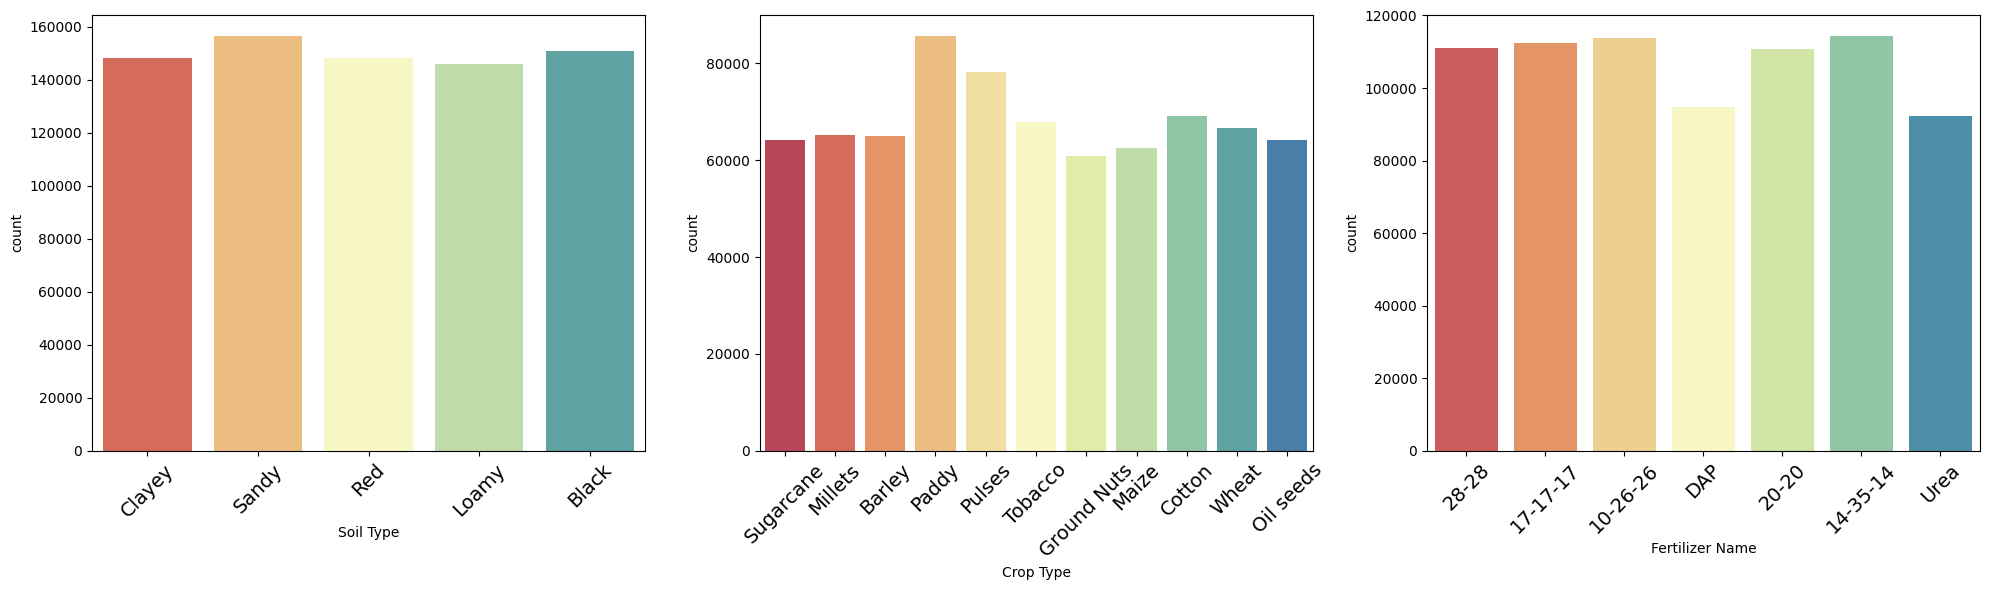

In [8]:
# Barplots for categorical variables

# Helper function to do that
def plot_barplots(df):
    col_name_list = df.select_dtypes(exclude=np.number).columns.tolist()
    # Create plot canvas
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    axes = axes.flatten()
    for i, col in tqdm(enumerate(col_name_list), total=len(col_name_list), desc="plotting"):
        sns.countplot(data=df, x=col, ax=axes[i], palette="Spectral")
        axes[i].set_xticks(axes[i].get_xticks(), axes[i].get_xticklabels(), rotation=45, fontsize=14)

    plt.tight_layout()

plot_barplots(train_data_v2)

<div style="text-align: center; color: red; font-size: 20px; font-weight: bold">
    <h1>3). Feature Engineering🛠️</h1>
</div>

In [9]:
# Import necessary libraries for this section
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## 3a). *Splitting the dataset*

In [10]:
X, y = train_data_v2.iloc[:, :8], train_data_v2.iloc[:, 8:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3b). *Data Transformation Pipeline*

In [11]:
# numerical columns
num_vars = X_train.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Basic data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(sparse=False), cat_vars)
])


X_train_v2 = data_pipeline.fit_transform(X_train)
X_test_v2 = data_pipeline.fit_transform(X_test)

y_train_v2 = OneHotEncoder(sparse=False).fit_transform(y_train)
y_test_v2 = OneHotEncoder(sparse=False).fit_transform(y_test)

In [12]:
# Transform the test dataset (for model inference)
test_data_v2 = data_pipeline.fit_transform(test_data)

<div style="text-align: center; color: pink; font-size: 20px; font-weight: bold">
    <h1>4). Modelling🤖Experiments🥼</h1>
</div>

In [13]:
# Importing libraries
import optuna
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold

## *Defining the MAP@3 metric*

In [14]:
def map3_score(predicted_top3: np.ndarray,   # shape = (n_val, 3), dtype = object or int
               y_true_fold: np.ndarray,      # shape = (n_val,)
              ) -> float:
    """
    predicted_top5[i] is a length‐3 array of labels (strings/ints) that your model thinks
    are most likely for sample i, ordered from most confident 3rd most confident.
    y_true_fold[i] is the single true label for sample i.
    We give credit = 1/rank if the true label is at position 'rank' in that top‐3 list;
    otherwise 0. Then we average over all i.
    """
    n_val = y_true_fold.shape[0]
    total_score = 0.0

    for i in range(n_val):
        true_label = y_true_fold[i]
        top3_preds = predicted_top3[i].tolist()  # convert row to a Python list

        try:
            # .index(...) returns 0-based position. Add +1 to get 1-based rank.
            rank = top3_preds.index(true_label) + 1
            if rank <= 3:
                total_score += 1.0 / rank
            # If rank > 3, that cannot happen here, because top3_preds has exactly 3 items.
        except ValueError:
            # true_label not in top-3  score += 0
            pass

    return total_score / n_val

<div style="text-align: center; color: pink; font-size: 20px; font-weight: bold">
    <h2>4a). CatBoost🐈</h2>
</div>

### 4ai). *Setting up Optuma for hyperparameter tuning (CatBoost)*

In [15]:
def catboost_objective(trial):
    # Define the parameter space for catboost
    params = {
        'iterations': trial.suggest_int('iterations', 500, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0, 5),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0, 2),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 5),
        'auto_class_weights' : trial.suggest_categorical('auto_class_weights', ['Balanced', None]),
    }
    
    # DEFINE THE CROSS-VALIDATION LOOP
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    map3_scores = []

    # For each fold, slice X_train_v2 & y_train by the indices
    for train_index, val_index in cv.split(X_train_v2, y_train):
        x_train_fold = X_train_v2[train_index]
        x_val_fold = X_train_v2[val_index]

        y_train_fold = y_train.iloc[train_index].values
        y_val_fold = y_train.iloc[val_index].values

        model = CatBoostClassifier(
            **params,
            random_seed=42,
            thread_count=-1,
            verbose=False,
            task_type="GPU",
            devices="0"
        )
        
        # Fit the model
        model.fit(x_train_fold, y_train_fold, 
                  eval_set=(x_val_fold, y_val_fold),
                 early_stopping_rounds=150,
                 use_best_model=True,
                 verbose=False
                 )
        pred_proba = model.predict_proba(x_val_fold)
        
        top3_index = np.argsort(pred_proba, axis=1)[:, -3:][:, ::-1] # Align the first 3 proba indexes, starting from the highest proba
        class_labels = model.classes_ # Return class names in the target variable (types of fertilizers)
        top3_labels = class_labels[top3_index] # Return first-three predictions

        fold_map3 = map3_score(top3_labels, y_val_fold)
        map3_scores.append(fold_map3)
        mean_map3 = np.mean(map3_scores)

        return mean_map3

In [16]:
study = optuna.create_study(direction="maximize", sampler=TPESampler(n_startup_trials=30, seed=42, multivariate=True))
study.optimize(catboost_objective, n_trials=50, n_jobs=1)

[I 2025-06-07 12:57:42,117] A new study created in memory with name: no-name-024ab435-dab9-4443-b26c-723f0bf18ee2
[I 2025-06-07 12:58:09,576] Trial 0 finished with value: 0.31012222222219965 and parameters: {'iterations': 2185, 'learning_rate': 0.28570714885887566, 'depth': 8, 'l2_leaf_reg': 2.993292420985183, 'border_count': 66, 'random_strength': 0.3119890406724053, 'bagging_temperature': 0.2904180608409973, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.31012222222219965.
[I 2025-06-07 12:59:44,698] Trial 1 finished with value: 0.31459722222220776 and parameters: {'iterations': 3687, 'learning_rate': 0.01596950334578271, 'depth': 10, 'l2_leaf_reg': 4.162213204002109, 'border_count': 79, 'random_strength': 0.36364993441420124, 'bagging_temperature': 0.9170225492671691, 'auto_class_weights': None}. Best is trial 1 with value: 0.31459722222220776.
[I 2025-06-07 13:00:03,927] Trial 2 finished with value: 0.30816249999997775 and parameters: {'iterations': 2444, 'learnin

In [17]:
# The best parameters
catboost_best_params = study.best_params
catboost_best_params

{'iterations': 3820,
 'learning_rate': 0.2839466858475117,
 'depth': 3,
 'l2_leaf_reg': 4.245507965247879,
 'border_count': 169,
 'random_strength': 0.1416768708009795,
 'bagging_temperature': 0.10225652601468996,
 'auto_class_weights': None}

### 4aii). *Final CatBoost Model (with the best parameters)*

In [18]:
# Fit the model with the best parameters
catboost_model = CatBoostClassifier(
    **catboost_best_params,
    random_seed=42,
    task_type="GPU",
    verbose=False
)

catboost_model.fit(X_train_v2, y_train) # Fit model to the training data
pred_proba = catboost_model.predict_proba(X_test_v2)

top3_index = np.argsort(pred_proba, axis=1)[:, -3:][:, ::-1]
class_labels = catboost_model.classes_
top3_labels = class_labels[top3_index]

map3 = map3_score(top3_labels, y_test.values)
print(f"MAP@3 Score: {map3}")

MAP@3 Score: 0.3350088888889713


### 4aiii). *CatBoost inference on the test data*

In [19]:
submission_probas = catboost_model.predict_proba(test_data_v2)

top3_index_subm = np.argsort(submission_probas, axis=1)[:, -3:][:, ::-1]
class_labels_subm = catboost_model.classes_
top3_labels_subm = class_labels_subm[top3_index_subm]

# Convert top 3 predictions to space-separated strings
preds_as_strings = [' '.join(labels) for labels in top3_labels_subm]

# Build the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'].values,
    'Fertilizer Name': preds_as_strings
})
submission.to_csv('/kaggle/working/submission.csv',index=False)

<div style="text-align: center; color: pink; font-size: 20px; font-weight: bold">
    <h2>4b). XGBoost🚀</h2>
</div>

### 4bi). *Setting up Optuna for hyperparameter tuning (XGBoost)*

In [20]:
def xgboost_objective(trial):
    # Define xgboost's parameter space
    params = {
        'booster': trial.suggest_categorical('booster', ["gbtree", "dart"]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_weight': trial.suggest_float('min_child_weight', 0, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'subsample': trial.suggest_float('subsample', 0, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1),
        'eta': trial.suggest_float('eta', 0, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0)
    }

    # DEFINE A CROSS-VALIDATION LOOP
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    map3_scores = []

    # Encord target labels to (1, 2, 3, 4, 5,...)
    lab_encoder = LabelEncoder()
    y_train_encoded = lab_encoder.fit_transform(y_train) 

    # For each fold, slice X_train_v2 & y_train_v2 by the indices
    for train_index, val_index in cv.split(X_train_v2, y_train_encoded):
        x_train_fold = X_train_v2[train_index]
        x_val_fold = X_train_v2[val_index]

        y_train_fold = y_train_encoded[train_index]
        y_val_fold = y_train_encoded[val_index]
        
        # The model
        model = xgb.XGBClassifier(
            **params,
            verbosity=0,
            objective='multi:softprob',
            enable_categorical=True,
            tree_method="gpu_hist", # Use the GPU
            gpu_id=0, 
            predictor="gpu_predictor",
            n_jobs=-1,
            random_seed=42
        )
        
        # Fit the model
        model.fit(x_train_fold, y_train_fold, eval_set=[(x_val_fold, y_val_fold)],
              early_stopping_rounds=50, verbose=False)
        # Prediction probas
        pred_proba = model.predict_proba(x_val_fold)
        top3_index = np.argsort(pred_proba, axis=1)[:, -3:][:, ::-1]
        class_labs = model.classes_
        top3_labs = class_labs[top3_index] # Return the first-three predicted classes

        fold_map3 = map3_score(top3_labs, y_val_fold)
        map3_scores.append(fold_map3)
        mean_map3 = np.mean(map3_scores)

        return mean_map3  

In [21]:
# study_2 = optuna.create_study(direction="maximize", sampler=TPESampler(n_startup_trials=30, seed=42, multivariate=True))
# study_2.optimize(xgboost_objective, n_trials=50, n_jobs=1)